In [254]:
import numpy as np
import pandas as pd

In [255]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [256]:
# EDA Step

In [257]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [258]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [259]:
train_data.shape

(891, 12)

In [260]:
test_data.shape

(418, 11)

In [261]:
import matplotlib.pyplot as plt

In [262]:
# for catagorecial data we use Bargraph

In [263]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

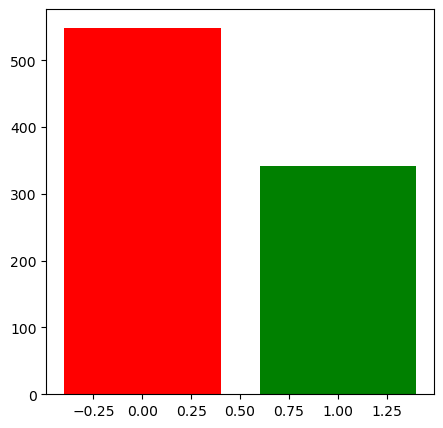

In [264]:
plt.figure(figsize=(5,5))
plt.bar(list(train_data['Survived'].value_counts().keys()),list(train_data['Survived'].value_counts()),color=["red","green"])
plt.show()

In [265]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

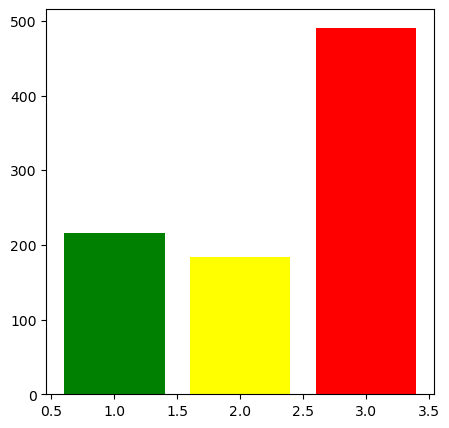

In [266]:
plt.figure(figsize=(5,5))
plt.bar(list(train_data['Pclass'].value_counts().keys()),list(train_data['Pclass'].value_counts()),color=["red","green","Yellow"])
plt.show()

In [267]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [268]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

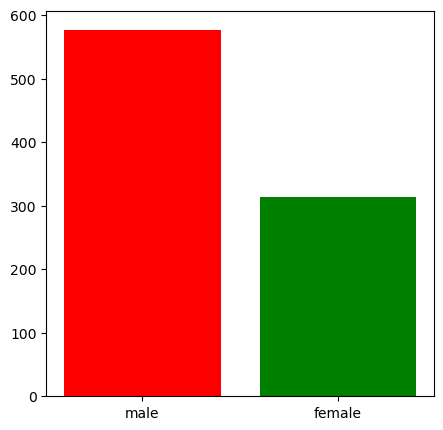

In [269]:
plt.figure(figsize=(5,5))
plt.bar(list(train_data['Sex'].value_counts().keys()),list(train_data['Sex'].value_counts()),color=["red","green"])
plt.show()

In [270]:
# for numerical data we use histogram

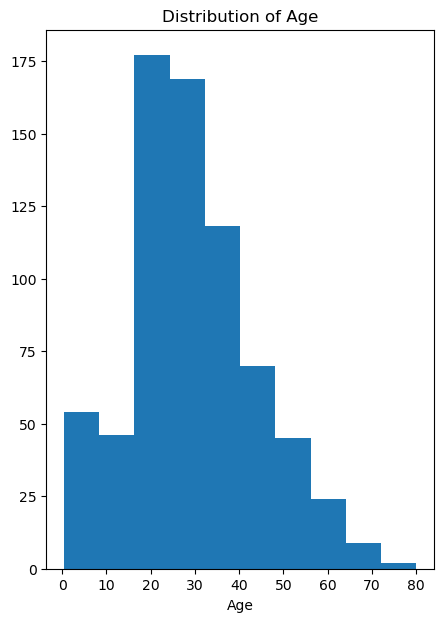

In [271]:
plt.figure(figsize=(5,7))
plt.hist(train_data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

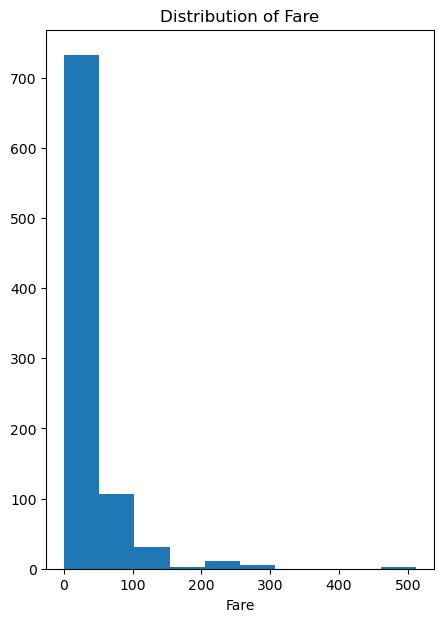

In [272]:
plt.figure(figsize=(5,7))
plt.hist(train_data['Fare'])
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.show()

In [273]:
sum(train_data['Survived'].isnull())

0

In [274]:
sum(train_data['Pclass'].isnull())

0

In [275]:
sum(test_data['Pclass'].isnull())

0

In [276]:
sum(train_data['Sex'].isnull())

0

In [277]:
sum(test_data['Sex'].isnull())

0

In [278]:
sum(train_data['Age'].isnull())

177

In [279]:
sum(test_data['Age'].isnull())

86

In [280]:
sum(train_data['SibSp'].isnull())

0

In [281]:
sum(test_data['SibSp'].isnull())

0

In [282]:
sum(train_data['Parch'].isnull())

0

In [283]:
sum(test_data['Parch'].isnull())

0

In [284]:
sum(train_data['Embarked'].isnull())

2

In [285]:
sum(test_data['Embarked'].isnull())

0

In [286]:
sum(train_data['Fare'].isnull())

0

In [287]:
sum(test_data['Fare'].isnull())

1

In [288]:
# Data Modelling

In [289]:
train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [290]:
test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [291]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [292]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [293]:
# fill nan values

In [294]:
train_data['Embarked'].fillna('S',inplace=True)
sum(train_data['Embarked'].isnull())

0

In [295]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
sum(train_data['Age'].isnull())

0

In [296]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
sum(test_data['Age'].isnull())

0

In [297]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)
sum(test_data['Fare'].isnull())

0

In [298]:
# converting categorical data in to numeric data

In [299]:
train_data['Sex'].replace(['female','male'],[0,1],inplace=True)
train_data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [300]:
test_data['Sex'].replace(['female','male'],[0,1],inplace=True)
test_data['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [301]:
train_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_data['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [302]:
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_data['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [303]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [304]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [305]:
train_data.shape

(891, 8)

In [306]:
test_data.shape

(418, 7)

In [307]:
# train model

In [308]:
from sklearn.ensemble import RandomForestClassifier

In [325]:
x_train=train_data.iloc[:,1:8]
y_train=train_data.iloc[:,0:1]

In [326]:
x_train=x_train.to_numpy()

In [327]:
x_train.shape

(891, 7)

In [328]:
y_train=y_train.to_numpy()

In [329]:
y_train.shape

(891, 1)

In [331]:
model=RandomForestClassifier()

In [332]:
model.fit(x_train,np.ravel(y_train,order='C'))

RandomForestClassifier()

In [317]:
# predict on testing data

In [333]:
x_test=test_data.iloc[:,0:7]
x_test.shape

(418, 7)

In [334]:
x_test=x_test.to_numpy()

In [335]:
y_predict=model.predict(x_test)

In [336]:
y_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,